<a href="https://colab.research.google.com/github/ChatMadhu/Linear-Regression/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and processing

In [3]:
#loading the data from csv file to pandas dataframne
car_dataset = pd.read_csv('/content/car data.csv')


In [4]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_dataset.shape

(301, 9)

In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
#checking the categorical data
print(car_dataset.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [17]:
print(car_dataset.Seller_Type.value_counts())

0    195
1    106
Name: Seller_Type, dtype: int64


In [18]:
print(car_dataset.Transmission.value_counts())

0    261
1     40
Name: Transmission, dtype: int64


In [22]:
#encoding the categorical data
#1) Fuel type column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
#2) Seller_Type column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
#3) Transmission column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [23]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


splitting data into data and target data.

In [28]:
X=car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y=car_dataset['Selling_Price']

In [30]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [31]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

Splitting training data and testing data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

model training for Linear Regression

In [47]:
Lin_Reg= LinearRegression()

In [48]:
Lin_Reg.fit(X_train, Y_train)

LinearRegression()

model evaluation

In [42]:
#prediction on training data
training_data_prediction= Lin_Reg.predict(X_train)
#R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction )
print("Error score for training data set is:",error_score)

Error score for training data set is: 0.8799451660493711


visualize the actual prices and predicted prices

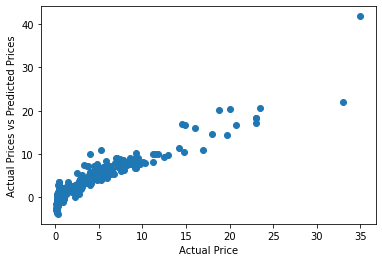

In [43]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Actual Prices vs Predicted Prices')
plt.show()

testing the model by  test data.

In [44]:
#prediction on testing data
testing_data_prediction= Lin_Reg.predict(X_test)
#R squared error
error_score = metrics.r2_score(Y_test,testing_data_prediction )
print("Error score for testing data set is:",error_score)

Error score for testing data set is: 0.8365766715027051


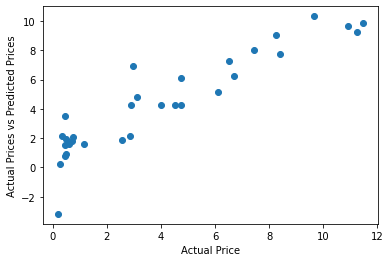

In [46]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Actual Prices vs Predicted Prices')
plt.show()

2)Let's train the model by Lasso Regression.

In [49]:
Lasso_Reg= Lasso()

In [50]:
Lasso_Reg.fit(X_train, Y_train)

Lasso()

model evaluation

In [51]:
#prediction on training data
training_data_prediction= Lasso_Reg.predict(X_train)
#R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction )
print("Error score for training data set is:",error_score)

Error score for training data set is: 0.8427856123435794


visualize the actual prices and predicted prices

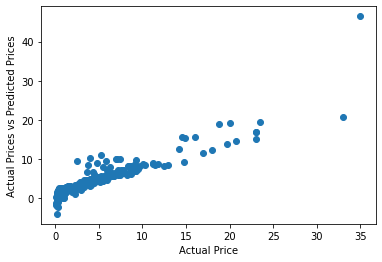

In [52]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Actual Prices vs Predicted Prices')
plt.show()

testing the model by  test data.

In [53]:
#prediction on testing data
testing_data_prediction= Lasso_Reg.predict(X_test)
#R squared error
error_score = metrics.r2_score(Y_test,testing_data_prediction )
print("Error score for testing data set is:",error_score)

Error score for testing data set is: 0.8709167941173195


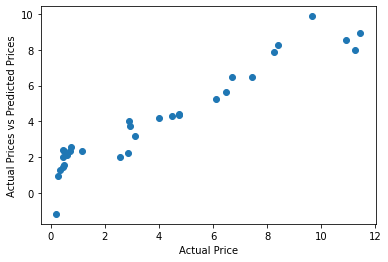

In [54]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Actual Prices vs Predicted Prices')
plt.show()